In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

def create_cnn_model(input_shape, num_classes):
    """Crée un modèle CNN simple"""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def test_model():
    """Test le modèle avec vos paramètres"""
    print("Création du modèle CNN simple")
    
    # Paramètres pour votre dataset
    input_shape = (64, 64, 3)  # Hauteur, Largeur, Canaux RGB
    num_classes = 10  # Vos 10 mots arabes
    
    # Créer le modèle
    model = create_cnn_model(input_shape, num_classes)
    
    # Afficher le résumé
    print(f"Modèle créé avec {model.count_params():,} paramètres")
    print("\nArchitecture du modèle:")
    model.summary()
    
    # Test avec des données factices
    print("\nTest avec données factices...")
    batch_size = 8
    X_test = np.random.random((batch_size,) + input_shape)
    
    # Test de prédiction
    predictions = model.predict(X_test, verbose=0)
    print(f"Prédictions shape: {predictions.shape}")
    print(f"Test réussi!")
    
    return model

if __name__ == "__main__":
    model = test_model()


Création du modèle CNN simple
Modèle créé avec 1,626,442 paramètres

Architecture du modèle:


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)


Test avec données factices...
Prédictions shape: (8, 10)
Test réussi!


In [11]:
import cv2
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
#from simple_cnn_model import create_cnn_model

def load_images_from_dataset(dataset_path, target_size=(64, 64)):
    """Charge les images du dataset"""
    print("Chargement des images...")

    dataset_path = Path(dataset_path)
    frames_path = dataset_path / "frames"

    if not frames_path.exists():
        print(f"Dossier non trouvé: {frames_path}")
        return None, None

    images = []
    labels = []

    # Mapping des mots vers des labels numériques
    word_to_label = {
        'akala': 0, 'bab': 1, 'bayt': 2, 'darasa': 3, 'kataba': 4,
        'kitab': 5, 'madrasa': 6, 'qalam': 7, 'talib': 8, 'usra': 9
    }

    # Parcourir chaque dossier correspondant à un mot
    for seq_folder in frames_path.iterdir():
        if not seq_folder.is_dir():
            continue

        word = ''.join([c for c in seq_folder.name if not c.isdigit()])
        if word not in word_to_label:
            continue

        label = word_to_label[word]

        # Lire chaque image dans ce dossier
        for img_file in seq_folder.glob("*.jpg"):
            try:
                img = cv2.imread(str(img_file))
                if img is None:
                    continue

                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(img_rgb, target_size)
                img_normalized = img_resized.astype('float32') / 255.0

                images.append(img_normalized)
                labels.append(label)

            except Exception as e:
                print(f"Erreur avec {img_file}: {e}")
                continue

    print(f"{len(images)} images chargées")
    print(f"Classes trouvées: {set(labels)}")

    return np.array(images), np.array(labels)

def train_simple_model(dataset_path):
    """Entraîne le modèle CNN simple"""
    print("ENTRAÎNEMENT DU MODÈLE SIMPLE")
    print("=" * 40)

    X, y = load_images_from_dataset(dataset_path)

    if X is None or len(X) == 0:
        print("Aucune donnée chargée")
        return None

    print("Préparation des données...")

    y_categorical = to_categorical(y, 10)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_categorical, test_size=0.2, random_state=42
    )

    print(f"Train: {len(X_train)} images")
    print(f"Test: {len(X_test)} images")

    print("Création du modèle...")
    model = create_cnn_model(input_shape=(64, 64, 3), num_classes=10)

    print("Entraînement...")
    history = model.fit(
        X_train, y_train,
        batch_size=32,
        epochs=50,
        validation_data=(X_test, y_test),
        verbose=1
    )

    print("Évaluation...")
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_acc:.4f}")

    model.save("simple_cnn_model.h5")
    print("Modèle sauvegardé: simple_cnn_model.h5")

    return model, history,X_train, X_test, y_train, y_test


  

In [12]:
dataset_path = r"C:\Users\LENOVO\Desktop\SDIA_S2_Mast\IA et Projet\projet_2\dataset_final"
model, history,X_train, X_test, y_train, y_test = train_simple_model(dataset_path)


ENTRAÎNEMENT DU MODÈLE SIMPLE
Chargement des images...
11408 images chargées
Classes trouvées: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Préparation des données...
Train: 9126 images
Test: 2282 images
Création du modèle...


C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entraînement...
Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.1150 - loss: 2.3027 - val_accuracy: 0.1608 - val_loss: 2.2445
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.1948 - loss: 2.1810 - val_accuracy: 0.2756 - val_loss: 1.9785
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.2908 - loss: 1.9779 - val_accuracy: 0.4089 - val_loss: 1.7553
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.3701 - loss: 1.7553 - val_accuracy: 0.4487 - val_loss: 1.5952
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 44s 90ms/step - accuracy: 0.4284 - loss: 1.5931 - val_accuracy: 0.5346 - val_loss: 1.3983
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.4713 - loss: 1.4490 - val_accuracy: 0.5666 - val_loss: 1.2765
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - accuracy: 0.5207 - loss: 1.3102 - val_accuracy: 0.6021 - val_loss: 1.1524
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 25s 87ms/step - accuracy: 0.5600 -

Test Accuracy: 0.8234
Modèle sauvegardé: simple_cnn_model.h5


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def plot_learning_curves_and_confusion_matrix(model, history, X_test, y_test, class_names):
    """Affiche la courbe d'apprentissage et la matrice de confusion"""
    
    # === COURBES D'APPRENTISSAGE ===
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Courbe d'accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'ro-', label='Validation acc')
    plt.title("Courbe d'accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Courbe de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title("Courbe de perte (loss)")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # === MATRICE DE CONFUSION ===
    # Prédictions (argmax car one-hot)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Matrice de confusion")
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies classes")
    plt.show()


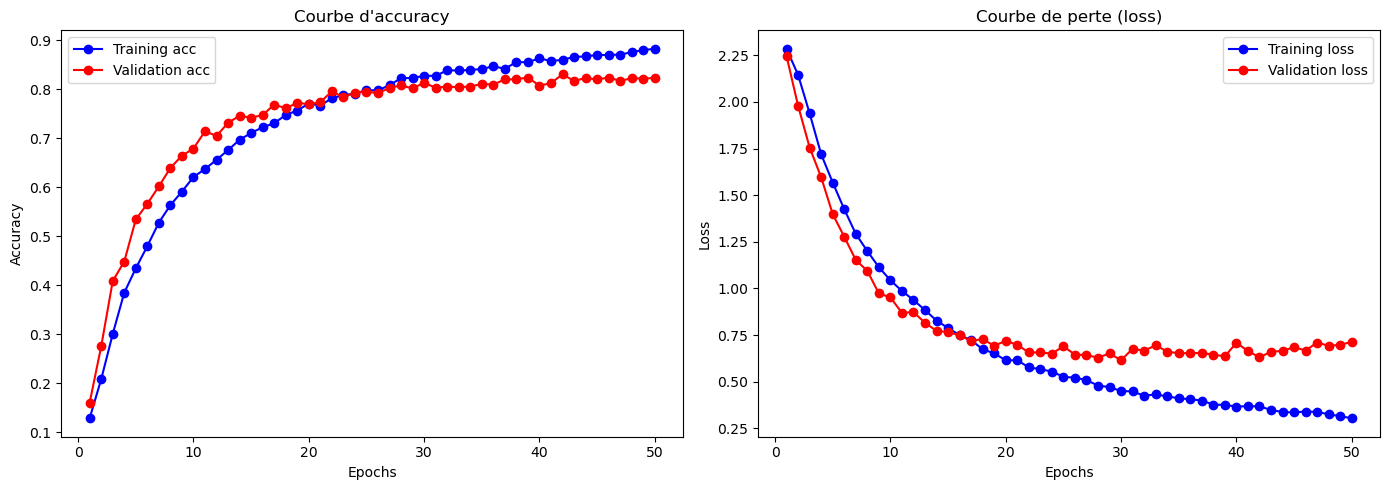

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


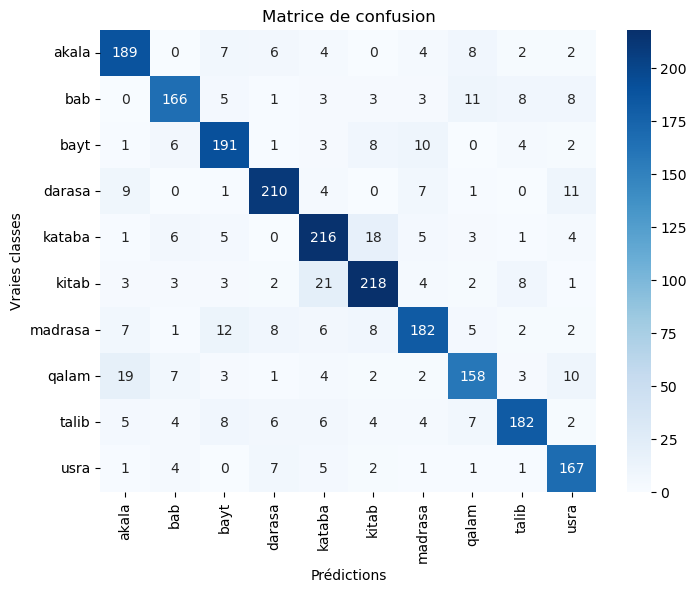

In [14]:
 class_names = ['akala', 'bab', 'bayt', 'darasa', 'kataba', 
                   'kitab', 'madrasa', 'qalam', 'talib', 'usra']

plot_learning_curves_and_confusion_matrix(model, history, X_test, y_test, class_names)


 TESTEUR DE MODÈLE DE LECTURE LABIALE
  Modèle chargé: simple_cnn_model.h5

OPTIONS :
1. Test sur fichier vidéo 
2. Test webcam en direct 


Choix (1 ou 2):  1
 Entrez le chemin de la vidéo (ex: C:\Videos\video1.mp4):  C:\Users\LENOVO\Desktop\SDIA_S2_Mast\IA et Projet\projet_2\usra.mp4
 Enregistrer la vidéo avec prédictions ? (y/n):  y


 Test sur vidéo: C:\Users\LENOVO\Desktop\SDIA_S2_Mast\IA et Projet\projet_2\usra.mp4
  Vidéo: 1920x1080, 59 FPS, 132 frames

 RÉSULTATS :
  ➤ Total prédictions : 132
  ➤ Confiance moyenne : 1.00
  ➤ Classe la plus prédite : usra (132)


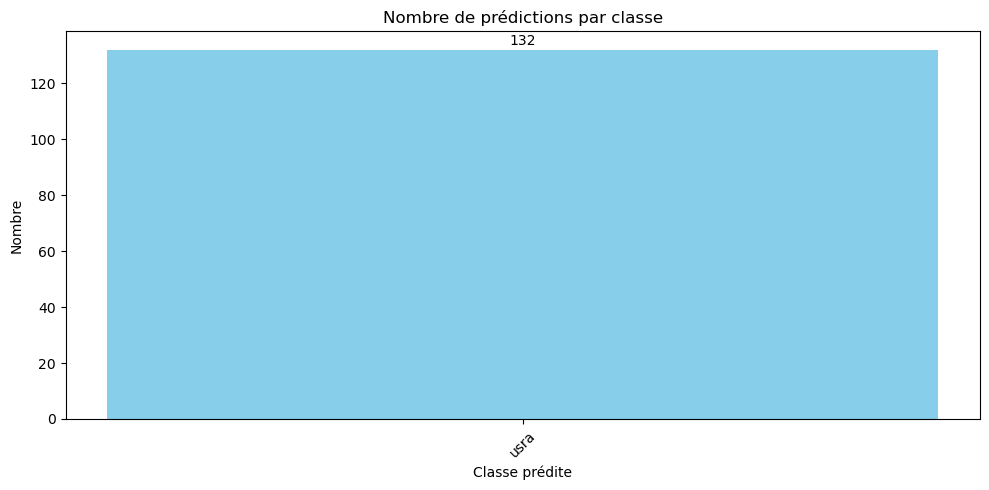

In [7]:
import cv2
import numpy as np
import tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
import time


class VideoLipReader:
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = None
        self.target_size = (64, 64)
        self.class_names = ['akala', 'bab', 'bayt', 'darasa', 'kataba', 
                            'kitab', 'madrasa', 'qalam', 'talib', 'usra']
        self.load_model()

    def load_model(self):
        try:
            self.model = tf.keras.models.load_model(self.model_path)
            print(f"  Modèle chargé: {self.model_path}")
        except Exception as e:
            print(f"  Erreur chargement modèle: {e}")
            return False
        return True

    def preprocess_frame(self, frame):
        try:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame_resized = cv2.resize(frame_rgb, self.target_size)
            frame_normalized = frame_resized.astype('float32') / 255.0
            return np.expand_dims(frame_normalized, axis=0)
        except Exception as e:
            print(f"  Erreur preprocessing: {e}")
            return None

    def predict_frame(self, frame):
        if self.model is None:
            return None, 0.0
        processed_frame = self.preprocess_frame(frame)
        if processed_frame is None:
            return None, 0.0
        try:
            predictions = self.model.predict(processed_frame, verbose=0)
            idx = np.argmax(predictions[0])
            return self.class_names[idx], predictions[0][idx]
        except Exception as e:
            print(f"  Erreur prédiction: {e}")
            return None, 0.0

    def test_on_video_file(self, video_path, output_path=None, show_live=True):
        print(f" Test sur vidéo: {video_path}")
        cap = cv2.VideoCapture(str(video_path))
        if not cap.isOpened():
            print(f"  Impossible d'ouvrir la vidéo: {video_path}")
            return None

        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        print(f"  Vidéo: {width}x{height}, {fps} FPS, {total_frames} frames")

        out = None
        if output_path:
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

        predictions = []
        confidences = []
        frame_count = 0

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame_count += 1
            predicted_class, confidence = self.predict_frame(frame)
            if predicted_class:
                predictions.append(predicted_class)
                confidences.append(confidence)
                text = f"{predicted_class}: {confidence:.2f}"
                cv2.putText(frame, text, (10, 30), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                frame_text = f"Frame: {frame_count}/{total_frames}"
                cv2.putText(frame, frame_text, (10, height - 20), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
            if show_live:
                cv2.imshow('Lip Reading Test', frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            if out:
                out.write(frame)
        cap.release()
        if out:
            out.release()
        cv2.destroyAllWindows()
        return self.analyze_predictions(predictions, confidences)

    def test_on_webcam(self, duration_seconds=10):
        print(f"  Test webcam ({duration_seconds}s)")
        cap = cv2.VideoCapture(0)
        if not cap.isOpened():
            print("  Impossible d'ouvrir la webcam")
            return None
        predictions, confidences = [], []
        start_time = time.time()
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            elapsed = time.time() - start_time
            if elapsed > duration_seconds:
                break
            predicted_class, confidence = self.predict_frame(frame)
            if predicted_class:
                predictions.append(predicted_class)
                confidences.append(confidence)
                text = f"{predicted_class}: {confidence:.2f}"
                cv2.putText(frame, text, (10, 30), 
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                remaining = duration_seconds - elapsed
                time_text = f"Temps restant: {remaining:.1f}s"
                cv2.putText(frame, time_text, (10, 70), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
            cv2.imshow('Webcam Test', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        cap.release()
        cv2.destroyAllWindows()
        return self.analyze_predictions(predictions, confidences)

    def analyze_predictions(self, predictions, confidences):
        if not predictions:
            print("  Aucune prédiction disponible")
            return None
        counts = Counter(predictions)
        total = len(predictions)
        avg_conf = np.mean(confidences)
        most_common = counts.most_common(1)[0]
        print("\n RÉSULTATS :")
        print(f"  ➤ Total prédictions : {total}")
        print(f"  ➤ Confiance moyenne : {avg_conf:.2f}")
        print(f"  ➤ Classe la plus prédite : {most_common[0]} ({most_common[1]})")
        return {
            'total': total,
            'avg_confidence': avg_conf,
            'prediction_counts': dict(counts),
            'most_predicted': most_common
        }

    def create_prediction_plot(self, results):
        if not results or 'prediction_counts' not in results:
            return
        counts = results['prediction_counts']
        classes = list(counts.keys())
        values = list(counts.values())
        plt.figure(figsize=(10, 5))
        bars = plt.bar(classes, values, color='skyblue')
        for bar, val in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
                     str(val), ha='center', va='bottom')
        plt.title("Nombre de prédictions par classe")
        plt.xlabel("Classe prédite")
        plt.ylabel("Nombre")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


def main():
    print(" TESTEUR DE MODÈLE DE LECTURE LABIALE")
    model_path = "simple_cnn_model.h5"
    if not Path(model_path).exists():
        print("  Modèle non trouvé.")
        return
    tester = VideoLipReader(model_path)
    if tester.model is None:
        return

    print("\nOPTIONS :")
    print("1. Test sur fichier vidéo ")
    print("2. Test webcam en direct ")
    choice = input("Choix (1 ou 2): ").strip()

    if choice == "1":
        video_path = input(" Entrez le chemin de la vidéo (ex: C:\\Videos\\video1.mp4): ").strip()
        if not Path(video_path).exists():
            print("  Fichier non trouvé.")
            return
        save_output = input(" Enregistrer la vidéo avec prédictions ? (y/n): ").strip().lower() == 'y'
        output_path = "video_avec_predictions.mp4" if save_output else None
        results = tester.test_on_video_file(video_path, output_path)

    elif choice == "2":
        duration = input(" Durée du test webcam en secondes (défaut = 10): ").strip()
        try:
            duration = int(duration)
        except:
            duration = 10
        results = tester.test_on_webcam(duration)

    else:
        print("  Choix invalide.")
        return

    if results:
        tester.create_prediction_plot(results)


if __name__ == "__main__":
    main()
